# Adult Dataset

The dataset was released by `Adult UCI Dataset`. The dataset  contains  around  14 independent variables and 48842 data points.

In [1]:
%matplotlib inline

# import all the basic modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# import visualising libraries
import matplotlib.gridspec as gridspec
import seaborn as sns

# import the models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# import hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

# import evaluation metrics
from sklearn.metrics import confusion_matrix , classification_report , precision_score , f1_score , recall_score
from sklearn.metrics import plot_roc_curve ,accuracy_score

# import warnings
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.index = range(len(df))

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

#### As most of the people are from United States we can classify the data as USA or non-USA resident

In [9]:
df.loc[df['native-country'] != 'United-States' , 'native-country'] = 'Non-United-States'

In [10]:
NULL = []
for i in df:
    value = df[i].isin([-1, 'NaN' , 'Null' , '?']).sum()
    NULL.append([f'{i} : {value}'])
print(*NULL, sep = "\n")

['age : 0']
['workclass : 2799']
['fnlwgt : 0']
['education : 0']
['educational-num : 0']
['marital-status : 0']
['occupation : 2809']
['relationship : 0']
['race : 0']
['gender : 0']
['capital-gain : 0']
['capital-loss : 0']
['hours-per-week : 0']
['native-country : 0']
['income : 0']


In [11]:
# removing the null values
df = df[df['native-country'] != '?']
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']

In [12]:
df['income'].value_counts()

<=50K    34611
>50K     11422
Name: income, dtype: int64

In [13]:
salary_map={'<=50K':0 , '>50K':1}
df['income']=df['income'].map(salary_map).astype(int)

In [14]:
df['income'].value_counts()

0    34611
1    11422
Name: income, dtype: int64

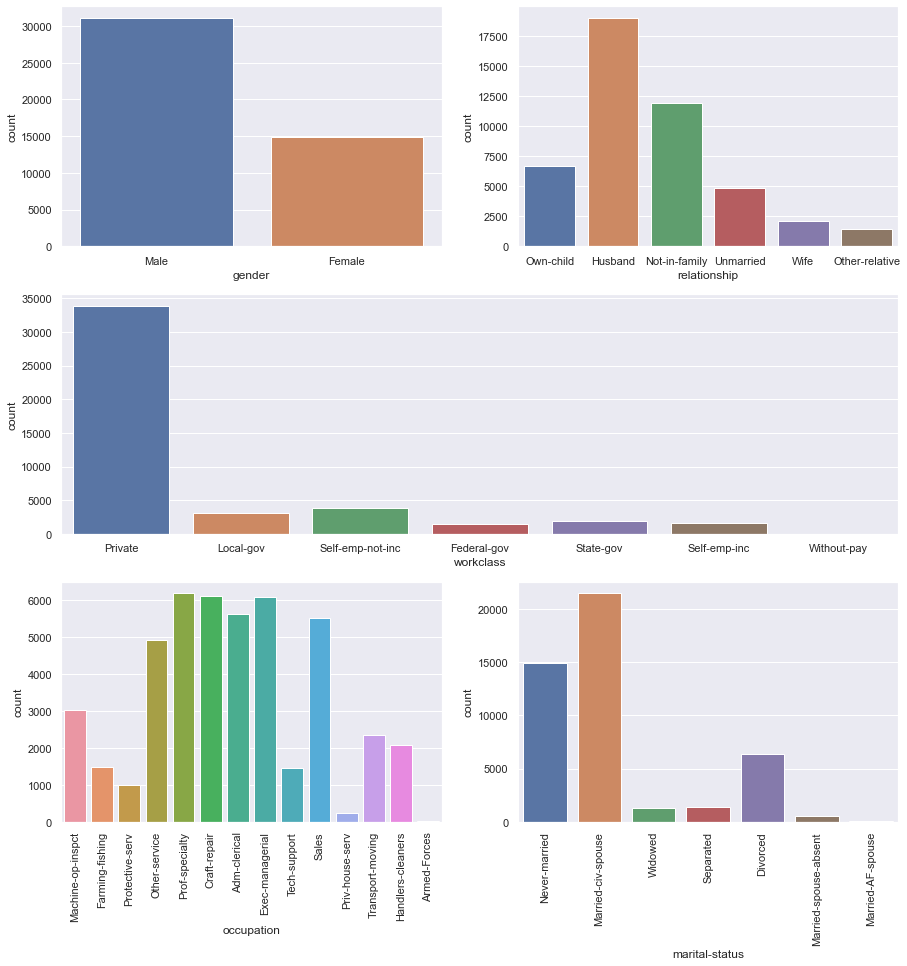

In [15]:
gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(df['gender'] ,ax=ax1)

ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(df['relationship'] ,ax=ax2)

ax3 = fig.add_subplot(gs[2, 0])
sns.countplot(df['occupation'] ,ax=ax3)
ax3.tick_params(axis='x', rotation=90)

ax4 = fig.add_subplot(gs[2, 1])
sns.countplot(df['marital-status'] ,ax=ax4)
ax4.tick_params(axis='x', rotation=90)

ax5 = fig.add_subplot(gs[1, :])
sns.countplot(df['workclass'] ,ax=ax5);

### From this Graph we can conclude that
* **Males are almost twice the number of females**
* **Most of the prople are tend to work in the Private sector.**
* **Husband tend to work more than wifes or children**
* **Very less number of people are working in tech support and Private house service**
* **almost no one is working in the armed forces**
* **Most people etiher have never married or is married with spouse present**

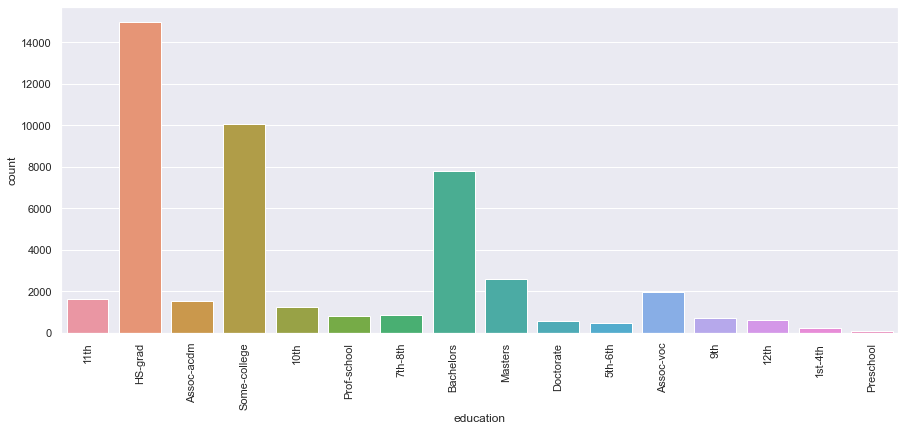

In [16]:
plt.figure(figsize=(15 , 6))
plt.xticks(rotation = 90)
sns.countplot(df['education']);

**Most people are either HS_grad or have gone to some college , very less people complete their doctorate.**

**Most people donot tend to do masters after completing their bachelors**

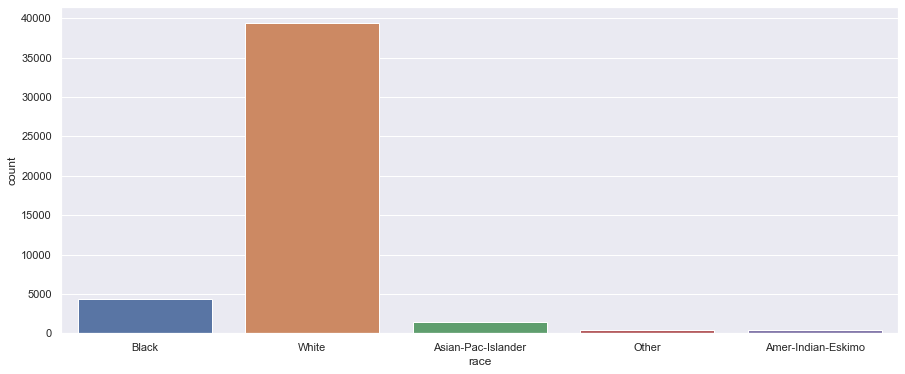

In [17]:
plt.figure(figsize=(15 , 6))
sns.countplot(df['race']);

**As the dataset contains more people from USA it is visible that the percentage of white people exceeds the others by a huge margin.**

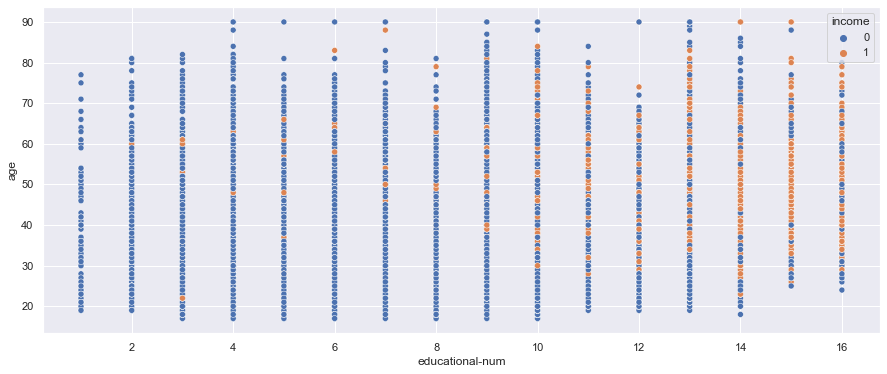

In [18]:
plt.figure(figsize=(15 , 6))
sns.scatterplot(data = df  , x = df['educational-num'] , y = df['age'] , hue=df['income']);

**The better your education numbers are the more salary you get.Also Salary increase with age**

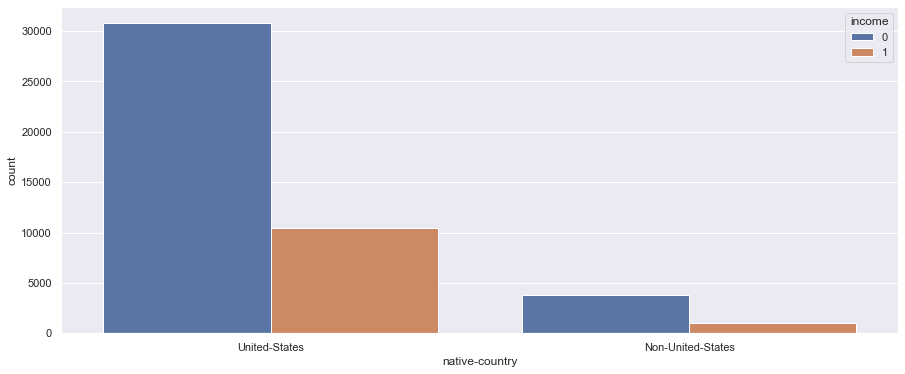

In [19]:
plt.figure(figsize=(15 , 6))
sns.countplot(df['native-country'] , hue=df['income']);

**The income ratio is almost same in and outside USA.**

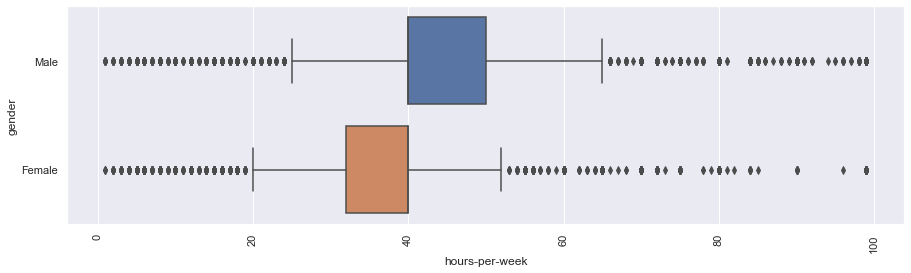

In [20]:
plt.figure(figsize=(15,4))
plt.xticks(rotation = 90)
sns.boxplot(x=df['hours-per-week'], y = 'gender', data=df);

**Males tend to work for more hours than the females.**

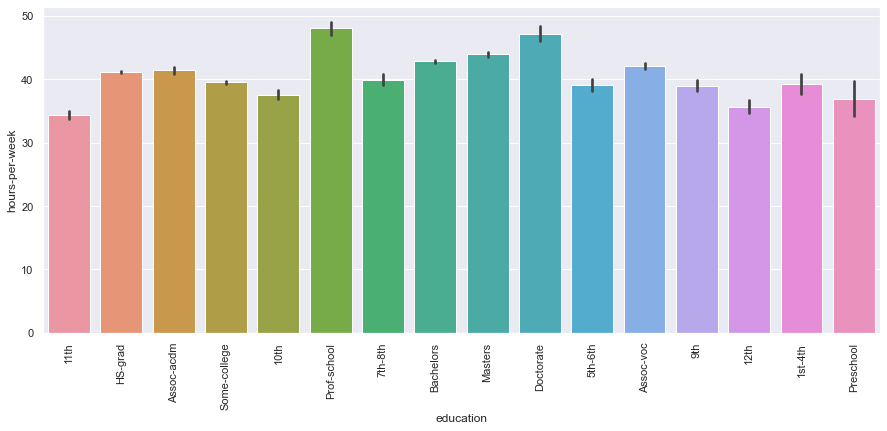

In [21]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
sns.barplot(x = df['education'] , y = df['hours-per-week']);

**The higher your eduction qualification the more hours you work per week**

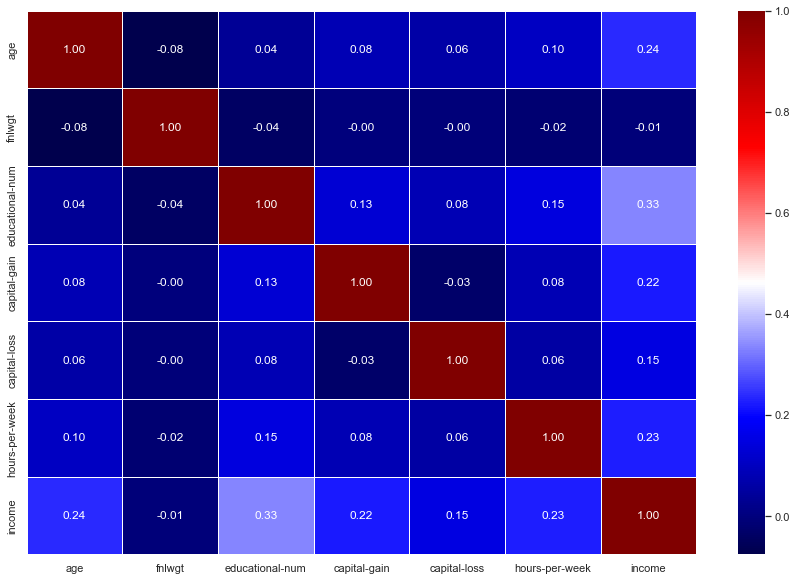

In [22]:
corr_mat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat , annot= True , fmt='.2f' , cmap='seismic' , linewidths= 0.5);

### From this Graph we can conclude that
* **Capital gain and capital loss is almost independent column**
* **As the age and educational-num increases income increases**
* **As the educational-num increases working hour increases**

## Conclusion from EDA 

### Converting both categorical and numerical columns

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46033 non-null  int64 
 1   workclass        46033 non-null  object
 2   fnlwgt           46033 non-null  int64 
 3   education        46033 non-null  object
 4   educational-num  46033 non-null  int64 
 5   marital-status   46033 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     46033 non-null  object
 8   race             46033 non-null  object
 9   gender           46033 non-null  object
 10  capital-gain     46033 non-null  int64 
 11  capital-loss     46033 non-null  int64 
 12  hours-per-week   46033 non-null  int64 
 13  native-country   46033 non-null  object
 14  income           46033 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 6.5+ MB


In [24]:
df['relationship'] =df['relationship'].astype('category').cat.codes
df['education'] =df['education'].astype('category').cat.codes
df['occupation'] =df['occupation'].astype('category').cat.codes
df['marital-status'] =df['marital-status'].astype('category').cat.codes

In [25]:
df = pd.concat([df, pd.get_dummies(df['workclass'] ,  prefix='workclass') ,pd.get_dummies(df['gender'] , prefix='gender') ,
                pd.get_dummies(df['race'] , prefix='race') , pd.get_dummies(df['native-country'] , prefix='native-country')], axis=1)

df.drop(columns=['workclass' , 'gender' , 'race' , 'native-country'], axis = 1 , inplace=True)

## Modeling of data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46033 entries, 0 to 48841
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   age                               46033 non-null  int64
 1   fnlwgt                            46033 non-null  int64
 2   education                         46033 non-null  int8 
 3   educational-num                   46033 non-null  int64
 4   marital-status                    46033 non-null  int8 
 5   occupation                        46033 non-null  int8 
 6   relationship                      46033 non-null  int8 
 7   capital-gain                      46033 non-null  int64
 8   capital-loss                      46033 non-null  int64
 9   hours-per-week                    46033 non-null  int64
 10  income                            46033 non-null  int32
 11  workclass_Federal-gov             46033 non-null  uint8
 12  workclass_Local-gov             

In [27]:
# Creating the train set and test set
X = df.drop('income' , axis = 1)
y = df['income']

# Spliting the datasets for testing and training for evaluation 
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)

In [28]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((32223, 26), (13810, 26), (32223,), (13810,))

In [29]:
# Models to test on
# Baseline scores

models = {'Logistic Regression' : LogisticRegression() , 
         'KNN' : KNeighborsClassifier() ,
         'Random Forests' : RandomForestClassifier() ,
         'Desicion Tree' : DecisionTreeClassifier() ,
         'Gradient Boosting' : GradientBoostingClassifier() ,
         'SVC' : SVC()}

# Fitting and checkin score of models
def prep_models(models , X_train , X_test , y_train  , y_test):
    """
        fitting and testing different models 
        models = dict of the required models
    """
    
    # set the random seed
    np.random.seed(45)
    
    #scores dict 
    mod_scores = {}
    
    for name , model in models.items():
        model.fit(X_train , y_train) # fitting the model
        pred = model.predict(X_test)
        # evaluating and adding the scores to the dict
        mod_scores[name] = {'Precision' : precision_score(pred , y_test ) , 
                           'Recall' : recall_score(pred , y_test ) , 
                           'F1 Score' : f1_score(pred , y_test )  , 
                           'Accuracy' : accuracy_score(pred , y_test )}
    return mod_scores

In [30]:
%%time
model_scores = prep_models(models , 
                           X_train = X_train ,
                           X_test = X_test , 
                          y_train = y_train , 
                          y_test = y_test)
model_display = pd.DataFrame(model_scores)
model_display

Wall time: 2min 16s


,Logistic Regression,KNN,Random Forests,Desicion Tree,Gradient Boosting,SVC
Precision,0.454308,0.574703,0.618509,0.599362,0.604003,0.553235
Recall,0.729390,0.645908,0.733150,0.596937,0.790433,0.754650
F1 Score,0.559886,0.608228,0.670968,0.598147,0.684756,0.638433
Accuracy,0.821723,0.815206,0.848588,0.798986,0.861188,0.843592


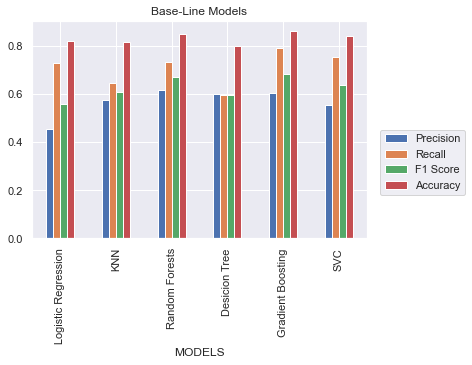

In [31]:
model_display.T.plot(kind = 'bar')
plt.title('Base-Line Models')
plt.legend(loc=(1.04 , 0.2))
plt.xlabel("MODELS")
plt.xticks(rotation = 90);

**The accuracy and F1 score of Gradient Boosting and Random Forest are much higher than the rest.So to find the best params we can use randomised search on both these to improve the results**

In [32]:
%%time
parameters = {
    "n_estimators":np.arange(0 , 1000 , 50),
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100],
    "min_samples_leaf" :np.arange(2,20,2),
    "min_samples_split" : np.arange(1,20,2)
}

np.random.seed(5)
rs_gbc = RandomizedSearchCV(GradientBoostingClassifier() , 
                           param_distributions=parameters , 
                           cv = 5 , # cross validation 
                           verbose=True ,
                           n_iter=20)
rs_gbc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 1h 17min 43s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600,
       650, 700, 750, 800, 850, 900, 950])},
                   verbose=True)

In [33]:
rs_gbc.best_params_

{'n_estimators': 150,
 'min_samples_split': 11,
 'min_samples_leaf': 18,
 'max_depth': 7,
 'learning_rate': 0.1}

In [29]:
clf = GradientBoostingClassifier(n_estimators = 150 , max_depth = 7, min_samples_leaf = 18, 
                             min_samples_split = 11 , learning_rate =0.1)
clf.fit(X_train , y_train)
clf.score(X_test,y_test)

0.8619116582186821

In [30]:
%%time
param_grid_rf = {'n_estimators' : np.arange(10 , 800 , 100) , 
                'max_depth' : [None , 3 , 7 , 10] ,
                'min_samples_split' : [11,1,3] , 
                'min_samples_leaf' : [14,2,4]}

np.random.seed(42)
rs_log = GridSearchCV(RandomForestClassifier() , 
                           param_grid=param_grid_rf , 
                           cv = 5 , # cross validation 
                           verbose=True)
rs_log.fit(X_train,y_train)
rs_log.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Wall time: 1h 51min 50s


{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 11,
 'n_estimators': 410}

In [31]:
np.random.seed(42)
clf = RandomForestClassifier(max_depth = None, min_samples_leaf = 4, 
                             min_samples_split = 11 , n_estimators = 410)
clf.fit(X_train , y_train)
clf.score(X_test,y_test)

0.8585083272990587

In [32]:
np.random.seed(45)
clf = GradientBoostingClassifier(n_estimators = 150 , max_depth = 7, min_samples_leaf = 18, 
                             min_samples_split = 11 , learning_rate =0.1)
clf.fit(X_train , y_train)
pred = clf.predict(X_test)

In [39]:
clf.score(X_train , y_train)

0.899854141451758

In [40]:
clf.score(X_test,y_test)

0.8619116582186821

In [33]:
print(confusion_matrix(pred , y_test))

[[9684 1228]
 [ 679 2219]]


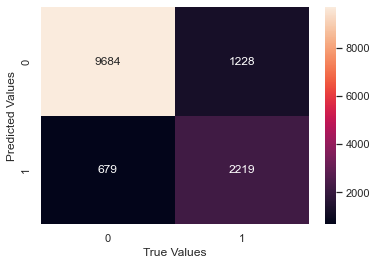

In [35]:
sns.heatmap(confusion_matrix(pred , y_test) , annot=True , fmt='g' )
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

In [36]:
print(classification_report(pred , y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10912
           1       0.64      0.77      0.70      2898

    accuracy                           0.86     13810
   macro avg       0.79      0.83      0.80     13810
weighted avg       0.87      0.86      0.87     13810



In [38]:
# cross validated precision , recall and F1 score

cv_acc = cross_val_score(clf , X , y , scoring='accuracy' , cv= 5)
print(f'accuracy = {np.mean(cv_acc)}')
cv_rec = cross_val_score(clf , X , y , scoring='recall' , cv= 5)
print(f'recall = {np.mean(cv_rec)}')
cv_pre = cross_val_score(clf , X , y , scoring='precision' , cv= 5)
print(f'precision = {np.mean(cv_pre)}')
cv_F1 = cross_val_score(clf , X , y , scoring='f1' , cv= 5)
print(f'F1_score = {np.mean(cv_F1)}')

accuracy = 0.8704843585818827
recall = 0.6659962751056728
precision = 0.7802194694024726
F1_score = 0.7175355418084935


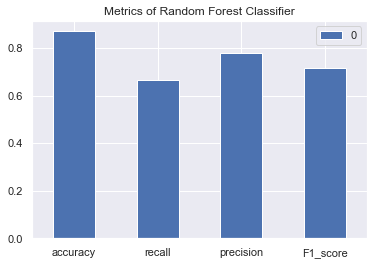

In [41]:
metrics = pd.DataFrame({'accuracy' : 0.8704843585818827,
'recall' : 0.6659962751056728,
'precision' : 0.7802194694024726,
'F1_score' : 0.7175355418084935} , index=[0])

metrics.T.plot(kind = 'bar' , title = 'Metrics of Random Forest Classifier')
plt.xticks(rotation = 0);

In [42]:
import pickle
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

Tried to `improve the results` more than the research papers finally got a accuracy of 8.7 using the `Gradient Boosting classifier`. The recall value is quite low as the salary more than `>50` is quite low compared to `<=50`So I made the choice of `Best Working Algorithm` based on `F1-score` and `Accuracy`.

Also from the research papers got the using `Gradient Boosting` and the use of `Box plot` in the data visualisation part.Learnt to use the subplots more efficiently.Learnt about `gridspec` in matplotlib.

## The best working model is Gradient Boosting Classifier with accuracy of 0.87 and a F1-score of 0.71 